# Deep Learning Intro with Keras # 
Today, we will be learning how to utilize one of the most prominent packages of Deep Learning: Keras. Keras is one of the more simple packages for deep learning, while there are others like PyTorch and Tensorflow that get a bit more into the nitty gritty. 

The dataset we will be using today is MNIST which consists of a bunch of handwritten digits and our goal is to be able to take a picture of the digit and classify it to the correct digit. 

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


## Let's see some of our data ## 
Using matplotlib's pyplot library 

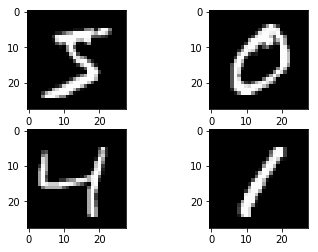

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

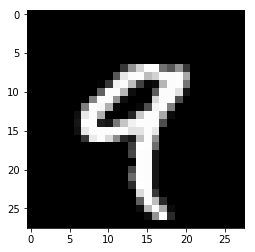

In [3]:
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1]**2
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def cool_model():
    model = Sequential()
    model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, 3, 3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model 

In [9]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2803 - acc: 0.9207 - val_loss: 0.1416 - val_acc: 0.9570
Epoch 2/10
 - 4s - loss: 0.1116 - acc: 0.9677 - val_loss: 0.0922 - val_acc: 0.9706
Epoch 3/10
 - 4s - loss: 0.0716 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9777
Epoch 4/10
 - 4s - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0743 - val_acc: 0.9762
Epoch 5/10
 - 4s - loss: 0.0373 - acc: 0.9891 - val_loss: 0.0670 - val_acc: 0.9790
Epoch 6/10
 - 4s - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 7/10
 - 4s - loss: 0.0208 - acc: 0.9949 - val_loss: 0.0617 - val_acc: 0.9809
Epoch 8/10
 - 4s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0626 - val_acc: 0.9802
Epoch 9/10
 - 4s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0573 - val_acc: 0.9822
Epoch 10/10
 - 4s - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0592 - val_acc: 0.9812
Baseline Error: 1.88%


In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

model_cool = cool_model()
model_cool.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model_cool.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/Users/calvin_wang/anaconda2/envs/women/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/Users/calvin_wang/anaconda2/envs/women/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 0.3107 - acc: 0.9049 - val_loss: 0.0662 - val_acc: 0.9781
Epoch 2/10
 - 38s - loss: 0.1057 - acc: 0.9685 - val_loss: 0.0427 - val_acc: 0.9866
Epoch 3/10
 - 37s - loss: 0.0786 - acc: 0.9757 - val_loss: 0.0368 - val_acc: 0.9875
Epoch 4/10
 - 38s - loss: 0.0631 - acc: 0.9807 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 5/10
 - 38s - loss: 0.0555 - acc: 0.9831 - val_loss: 0.0298 - val_acc: 0.9903
Epoch 6/10
 - 38s - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 7/10
 - 38s - loss: 0.0443 - acc: 0.9867 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 8/10
 - 39s - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0276 - val_acc: 0.9913
Epoch 9/10
 - 40s - loss: 0.0385 - acc: 0.9874 - val_loss: 0.0264 - val_acc: 0.9915
Epoch 10/10
 - 39s - loss: 0.0341 - acc: 0.9896 - val_loss: 0.0290 - val_acc: 0.9913
Baseline Error: 0.87%
